In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np
import random
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm
import pickle

from canvas import *
from placer import *

## Pseudo Testcase Generation

In [2]:
# make some boxes and nets
box_collection = {}
net_collection = {}

# generate 10 boxes and 3 nets
for i in range(10):
    net_idx = int(i % 3)
    box_collection[f"box_{i}"] = Box(
        box_name=f"box_{i}",
        llx=random.randint(5, 95),
        lly=random.randint(5, 95),
        width=random.randint(5, 10),
        height=random.randint(5, 10),
        net_name=f"net_{net_idx}",
    )

    if f"net_{net_idx}" not in net_collection:
        net_collection[f"net_{net_idx}"] = Net(
            net_name=f"net_{net_idx}", source_box_name=f"box_{i}", sink_box_names=[]
        )
    else:
        net_collection[f"net_{net_idx}"].add_sink_box_name(f"box_{i}")

# make a canvas
pcb_canvas = PCBCanvas(width=100, height=100, boxes=box_collection, nets=net_collection)
print("number of boxes:", len(pcb_canvas.boxes))
print("number of nets:", len(pcb_canvas.nets))

# pickle the canvas
pickle_id = '02'
# with open(f"./testcase/pcb_canvas_{pickle_id}.pkl", "wb") as f:
#     pickle.dump(pcb_canvas, f)

number of boxes: 10
number of nets: 3


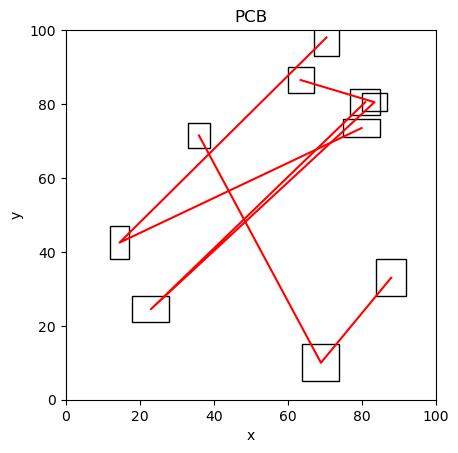

wirelength:	 864.7474956024734


In [3]:
# load the canvas
with open(f"./testcase/pcb_canvas_{pickle_id}.pkl", "rb") as f:
    pcb_canvas = pickle.load(f)

pcb_canvas.plot()
print("wirelength:\t", pcb_canvas.get_total_wirelength_from_cxy())

wirelength:	 726.7938603470282


/home/dinple/Github/PointCloudPlacer/.conda/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:273: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


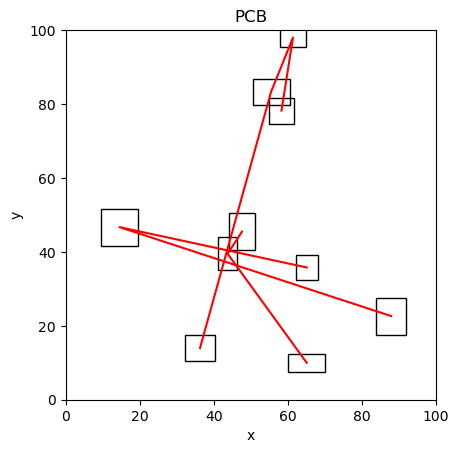

In [4]:
# make a placer
PCBPlacer = PCBPlacer(pcb_canvas)

# init placement
PCBPlacer.init_plc_spectral()
print("wirelength:\t", pcb_canvas.get_total_wirelength_from_cxy())
pcb_canvas.plot()

  0%|          | 0/100 [00:00<?, ?it/s]

/home/dinple/Github/PointCloudPlacer/placer.py:80: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1695392020201/work/torch/csrc/utils/tensor_new.cpp:261.)
  anchor = torch.tensor([source_box_A_cxy, source_box_A_cxy], requires_grad=True)


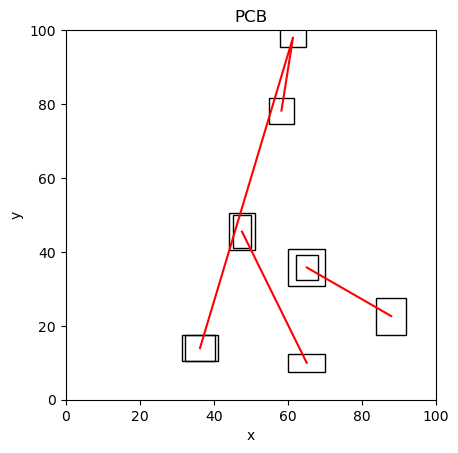

In [5]:
PCBPlacer.triplet_loss_placement(iteration=100)
pcb_canvas.plot()

In [6]:
# generating a gif from ./plot/ folder
# sort the files based on the trailing number
import re
import os

def sort_key(s):
    if s:
        try:
            c = re.findall(r'\d+$', s)[0]
        except:
            c = -1
        return int(c)

def sort_files( l ):
    l.sort( key=sort_key )
    return l

# make gif
import imageio
images = []
filenames = sort_files(os.listdir('./plot/'))
filenames = ['./plot/' + filename for filename in filenames]
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('./pcb_placer.gif', images, duration=1.5)


/tmp/ipykernel_2620377/602876161.py:24: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


In [7]:
print("wirelength:\t", pcb_canvas.get_total_wirelength_from_cxy())

wirelength:	 707.8720425896256
